In [1]:
#import libraries and packages
import keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Once we've got tensorflow imported, we can then begin to prepare our data, model it, and then train it. For the sake of simplicity, we'll be using the most common "hello world" example for deep learning, which is the mnist dataset. It's a dataset of hand-written digits, 0 through 9. It's 28x28 images of these hand-written digits. We will show an example of using outside data as well, but, for now, let's load in this data

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

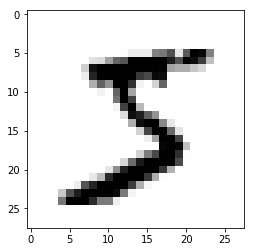

In [6]:
#Visualising the data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

It's generally a good idea to "normalize" your data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

In [7]:
x_train = keras.utils.normalize(x_train, axis=1)
y_train = keras.utils.normalize(x_train, axis=1)

Great! Now let us take a look at our normalized dataset

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

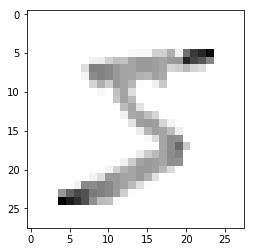

In [9]:
#Visualising the data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Alright, still a 5. Now let's build our model!

In [16]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
#model.add(keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
#model.add(keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model.

We popped in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

The dense (fully connected) layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start.
We added more identical layers for good measure and then the final layer as the output.

This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.

Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

In [17]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

Remember why we picked relu as an activation function? Same thing is true for the Adam optimizer. It's just a great default to start with.

Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

In [19]:
model.fit(x_train, y_train, epochs=3)

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (60000, 28, 28)